In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style='darkgrid')

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.shape

(9800, 18)

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df.dropna(inplace=True)

# TOP 10 BUYERS

In [9]:
customer_deals=df['Customer Name'].value_counts().reset_index().head(10)

In [10]:
customer_deals

,index,Customer Name
0,William Brown,35
1,Matt Abelman,34
2,Paul Prost,34
3,John Lee,33
4,Chloris Kastensmidt,32
5,Seth Vernon,32
6,Jonathan Doherty,32
7,Arthur Prichep,31
8,Zuschuss Carroll,31
9,Emily Phan,31


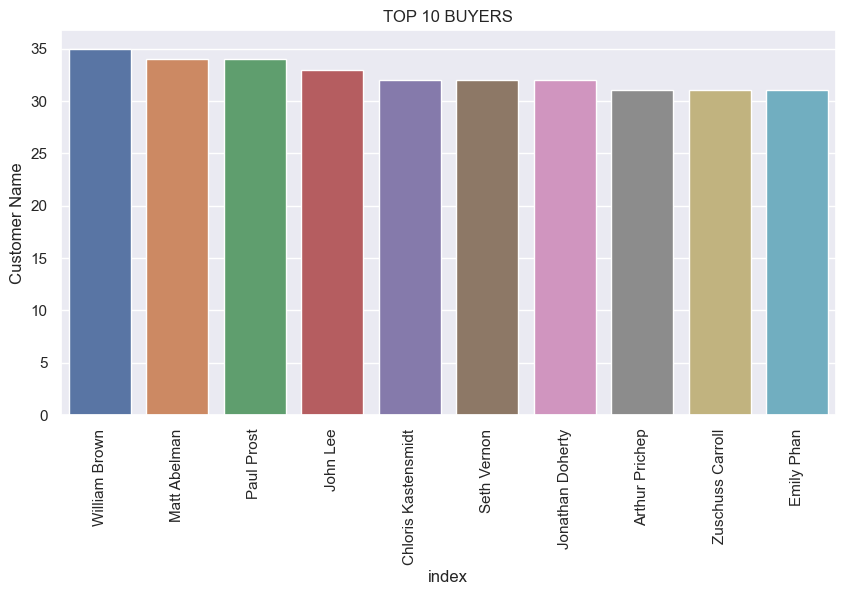

In [27]:
plt.figure(figsize=(10,5))
plt.title('TOP 10 BUYERS')
plt.xticks(rotation=90)
sns.barplot(x='index',y='Customer Name',data=customer_deals);

# NO. OF PRODUCTS SOLD IN STATS AND CITY

In [28]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [29]:
state=df.groupby(['State'])['City'].count().sort_values(ascending=False)

In [30]:
state

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
New Jersey               122
Oregon                   122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada  

# YEAR WISE SALE

In [31]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [32]:
df['Day']=df['Order Date'].dt.day

In [33]:
df['Month']=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year

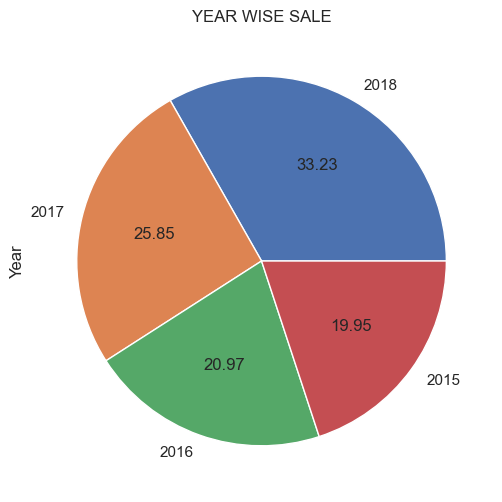

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('YEAR WISE SALE')
df['Year'].value_counts().plot.pie(autopct='%.2f');

# TOTAL YEAR WISE SALES

In [35]:
data_2015=df[df['Year']==2015]
total_earning_2015=data_2015['Sales'].sum()
total_earning_2015

479856.20810000005

In [36]:
data_2016=df[df['Year']==2016]
total_earning_2016=data_2016['Sales'].sum()
total_earning_2016

454315.90540000005

In [37]:
data_2017=df[df['Year']==2017]
total_earning_2017=data_2017['Sales'].sum()
total_earning_2017

597225.49

In [38]:
data_2018=df[df['Year']==2018]
total_earning_2018=data_2018['Sales'].sum()
total_earning_2018

721209.8092

In [39]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Day', 'Month', 'Year'],
      dtype='object')

# NO. OF CATEGORY AND SUBCATEGORY SOLD

In [40]:
cat_subcat=df.groupby(['Category'])['Sub-Category'].value_counts()

In [41]:
cat_subcat=pd.DataFrame(cat_subcat)

In [42]:
cat_subcat

Sub-Category
Category        Sub-Category              
Furniture       Furnishings            931
                Chairs                 606
                Tables                 314
                Bookcases              225
Office Supplies Binders               1492
                Paper                 1336
                Storage                831
                Art                    784
                Appliances             458
                Labels                 357
                Envelopes              247
                Fasteners              214
                Supplies               184
Technology      Phones                 875
                Accessories            754
                Machines               115
                Copiers                 66

# MAXIMUM CATEGORY THAT HAS BEEN SOLD

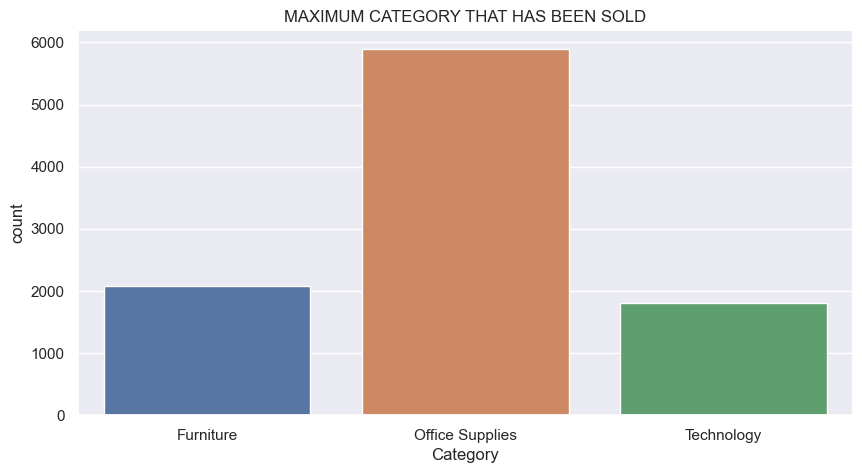

In [43]:
plt.figure(figsize=(10,5))
plt.title('MAXIMUM CATEGORY THAT HAS BEEN SOLD')
sns.countplot('Category',data=df);

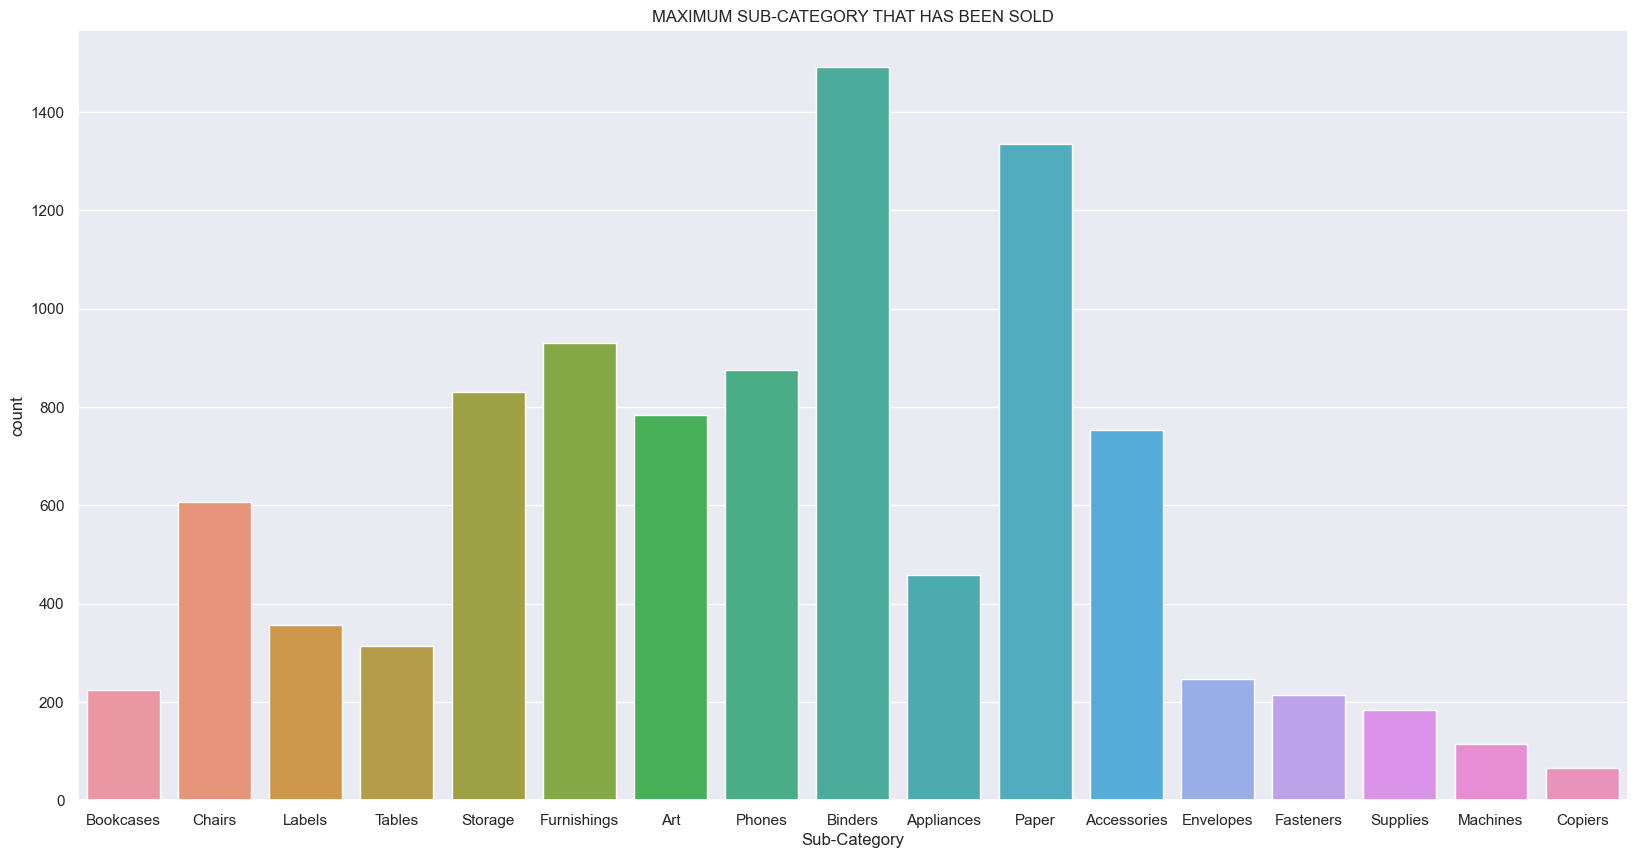

In [44]:
plt.figure(figsize=(20,10))
plt.title('MAXIMUM SUB-CATEGORY THAT HAS BEEN SOLD')
sns.countplot('Sub-Category',data=df);

In [45]:
sale_2015=data_2015.groupby(['Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

In [46]:
sale_2015

,Sub-Category,Sales
13,Phones,77225.9560
5,Chairs,77046.4400
11,Machines,62023.3730
14,Storage,49197.5260
16,Tables,45757.7775
3,Binders,43263.2670
0,Accessories,23766.3960
4,Bookcases,20036.6776
1,Appliances,15160.7150
15,Supplies,14335.6200


In [47]:
sale_2016=data_2016.groupby(['Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

In [48]:
sale_2016

,Sub-Category,Sales
5,Chairs,69939.4730
13,Phones,67870.6140
14,Storage,43321.2080
0,Accessories,40443.9700
3,Binders,36049.7460
16,Tables,35397.1955
4,Bookcases,33071.8749
11,Machines,27763.6970
6,Copiers,26179.4500
1,Appliances,23228.1790


In [49]:
sale_2017=data_2017.groupby(['Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
sale_2018=data_2018.groupby(['Sub-Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)

In [50]:
sale_2017

,Sub-Category,Sales
5,Chairs,81930.3450
13,Phones,76705.4700
16,Tables,60762.1125
14,Storage,57187.6660
11,Machines,55906.8860
3,Binders,48994.5170
6,Copiers,46319.4740
0,Accessories,41635.3840
9,Furnishings,26845.1160
4,Bookcases,26275.4665


In [51]:
sale_2018

,Sub-Category,Sales
13,Phones,104685.6580
5,Chairs,93191.2730
3,Binders,71721.2550
14,Storage,68072.7020
6,Copiers,62899.3880
16,Tables,60893.5425
0,Accessories,58035.9400
11,Machines,43544.6750
1,Appliances,39669.7820
4,Bookcases,30024.2797


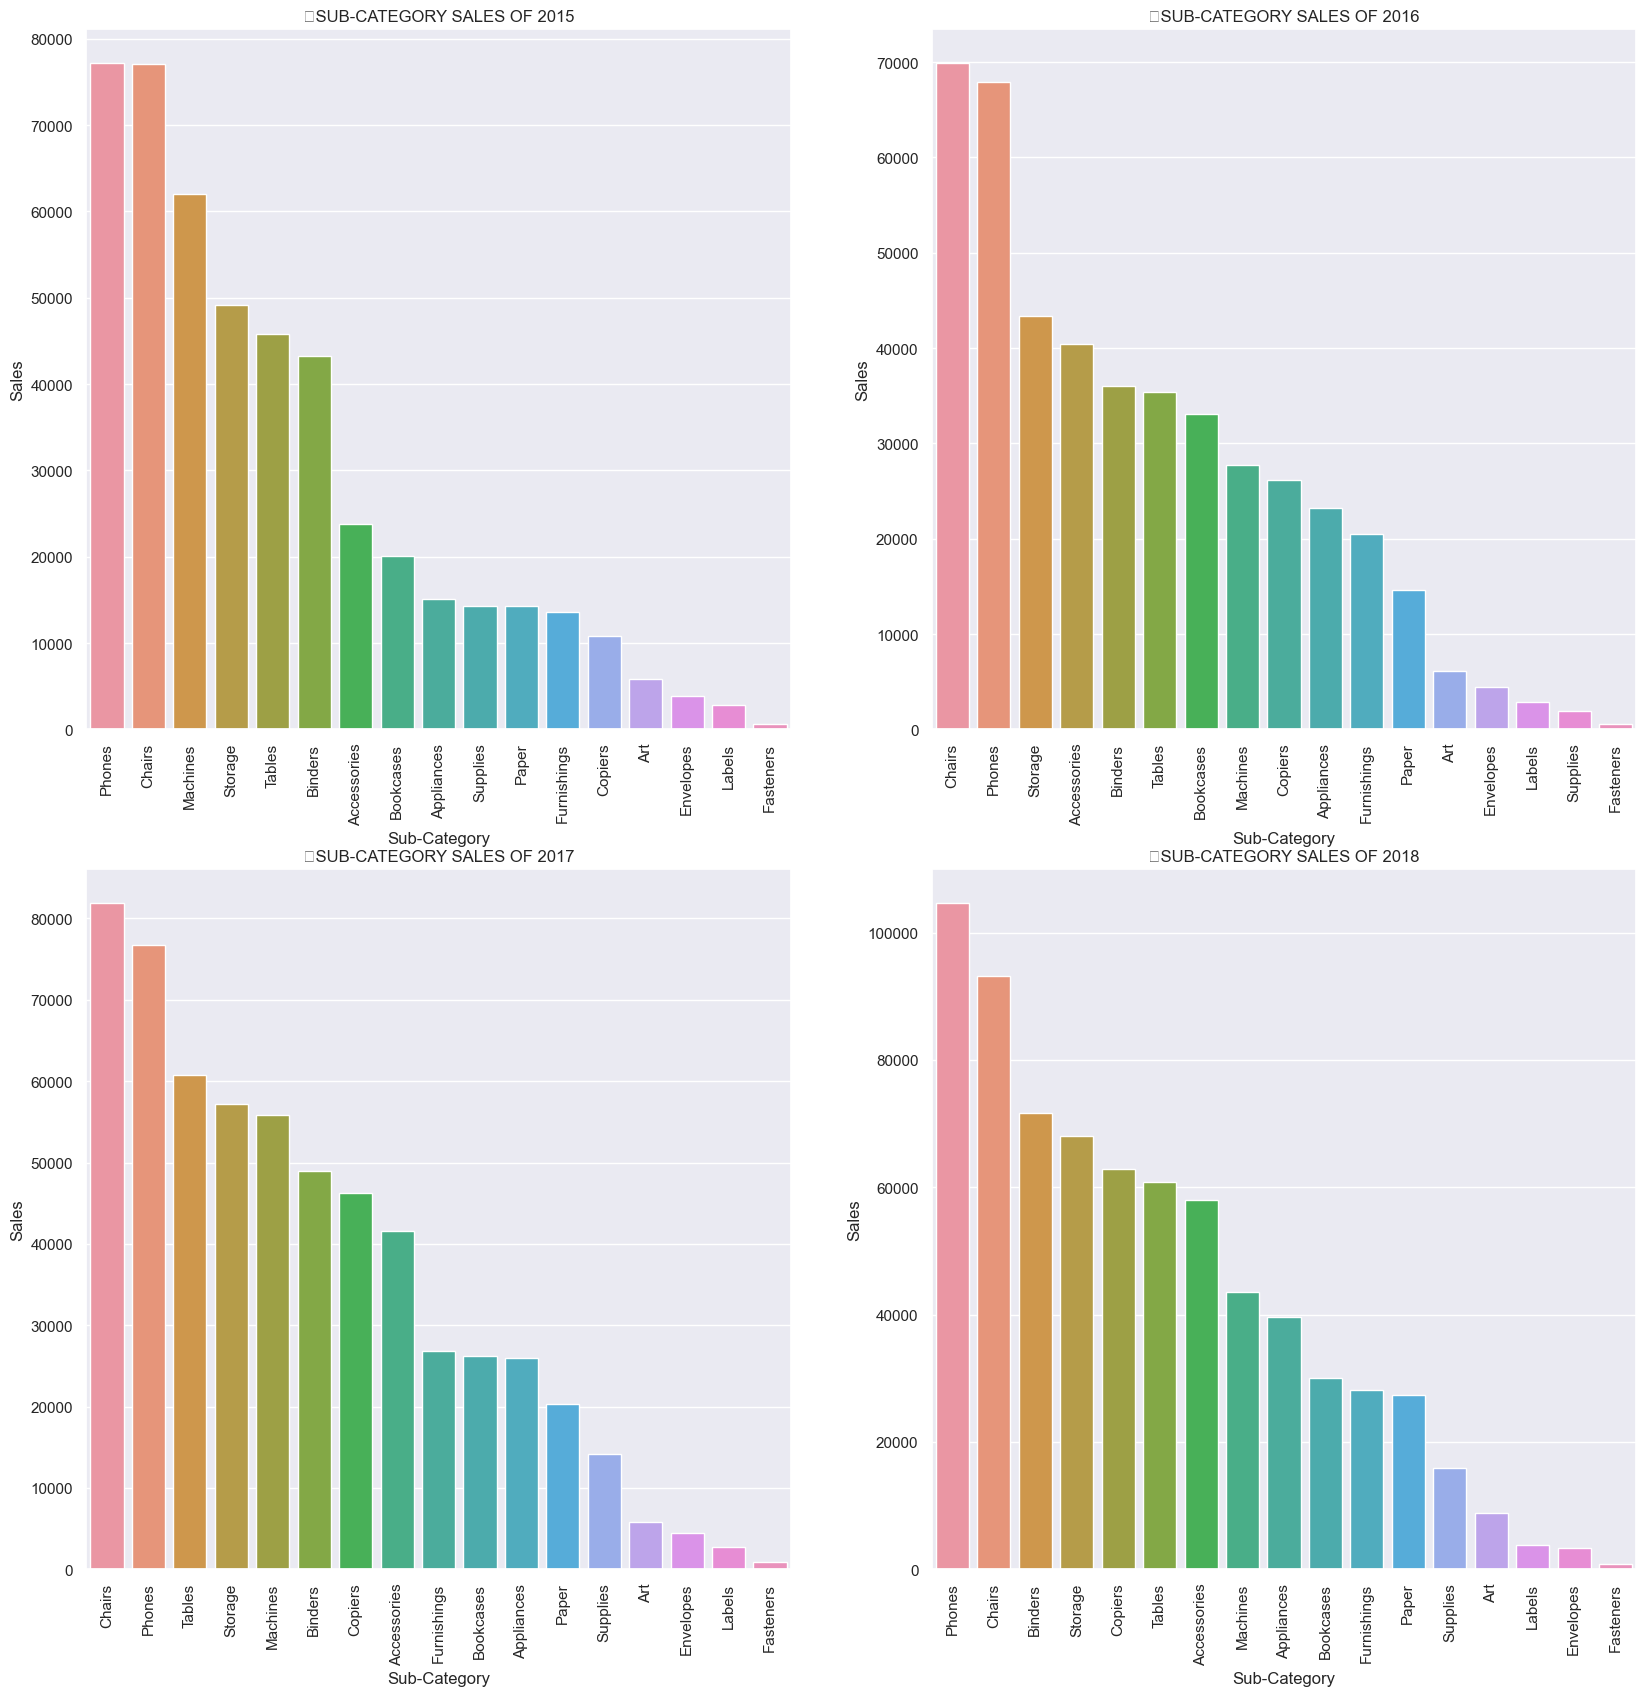

In [52]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('	SUB-CATEGORY SALES OF 2015')
sns.barplot('Sub-Category','Sales',data=sale_2015);
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('	SUB-CATEGORY SALES OF 2016')
sns.barplot('Sub-Category','Sales',data=sale_2016);
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('	SUB-CATEGORY SALES OF 2017')
sns.barplot('Sub-Category','Sales',data=sale_2017);
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title('	SUB-CATEGORY SALES OF 2018')
sns.barplot('Sub-Category','Sales',data=sale_2018);
plt.xticks(rotation=90)

plt.show()

In [53]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Day', 'Month', 'Year'],
      dtype='object')

# TOP 10 MOST SOLD PRODUCT

In [54]:
most_sold_product=df['Product Name'].value_counts().reset_index().sort_values('Product Name',ascending=False).head(10)
most_sold_product

,index,Product Name
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staples in misc. colors,18
5,Staple remover,18
6,KI Adjustable-Height Table,17
7,Storex Dura Pro Binders,17
8,Staple-based wall hangings,16
10,Logitech 910-002974 M325 Wireless Mouse for We...,15


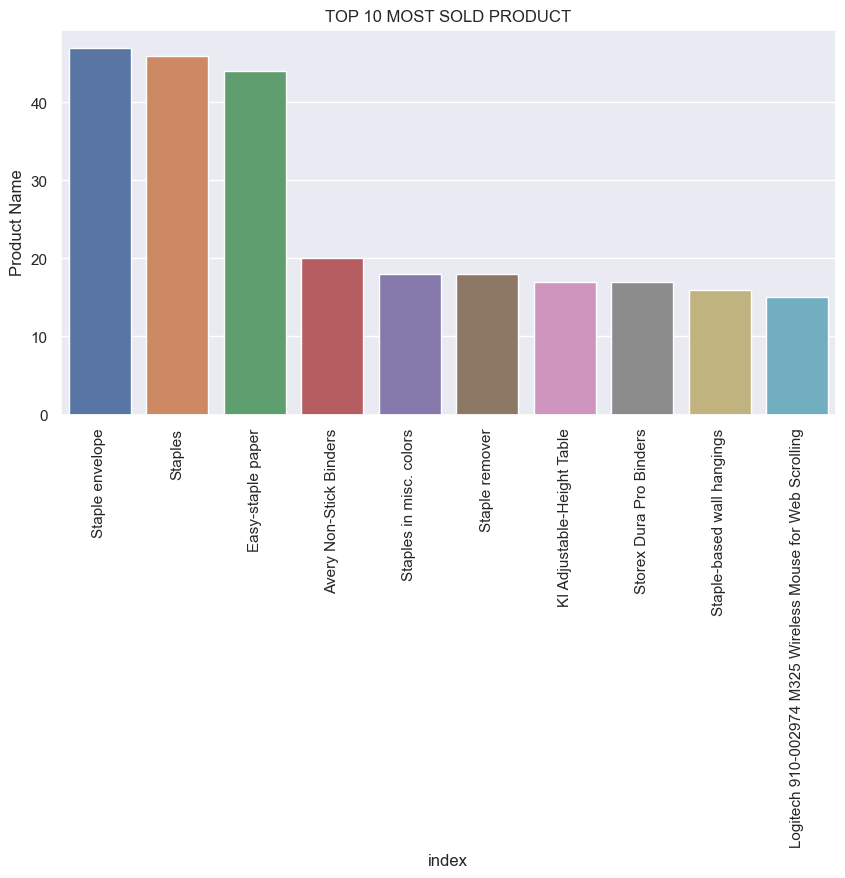

In [57]:
plt.figure(figsize=(10,5))
plt.title('TOP 10 MOST SOLD PRODUCT')
plt.xticks(rotation=90)
sns.barplot(x='index',y='Product Name',data=most_sold_product)
plt.show()

# SEGAMENT BASED SALES YEAR WISE

In [58]:
segament_2015=data_2015['Segment'].value_counts().reset_index()
segament_2016=data_2016['Segment'].value_counts().reset_index()
segament_2017=data_2017['Segment'].value_counts().reset_index()
segament_2018=data_2018['Segment'].value_counts().reset_index()

In [59]:
segament_2015

,index,Segment
0,Consumer,1045
1,Corporate,601
2,Home Office,307


In [60]:
segament_2016

,index,Segment
0,Consumer,1111
1,Corporate,607
2,Home Office,335


In [61]:
segament_2017

,index,Segment
0,Consumer,1304
1,Corporate,772
2,Home Office,454


In [62]:
segament_2018

,index,Segment
0,Consumer,1636
1,Corporate,968
2,Home Office,649


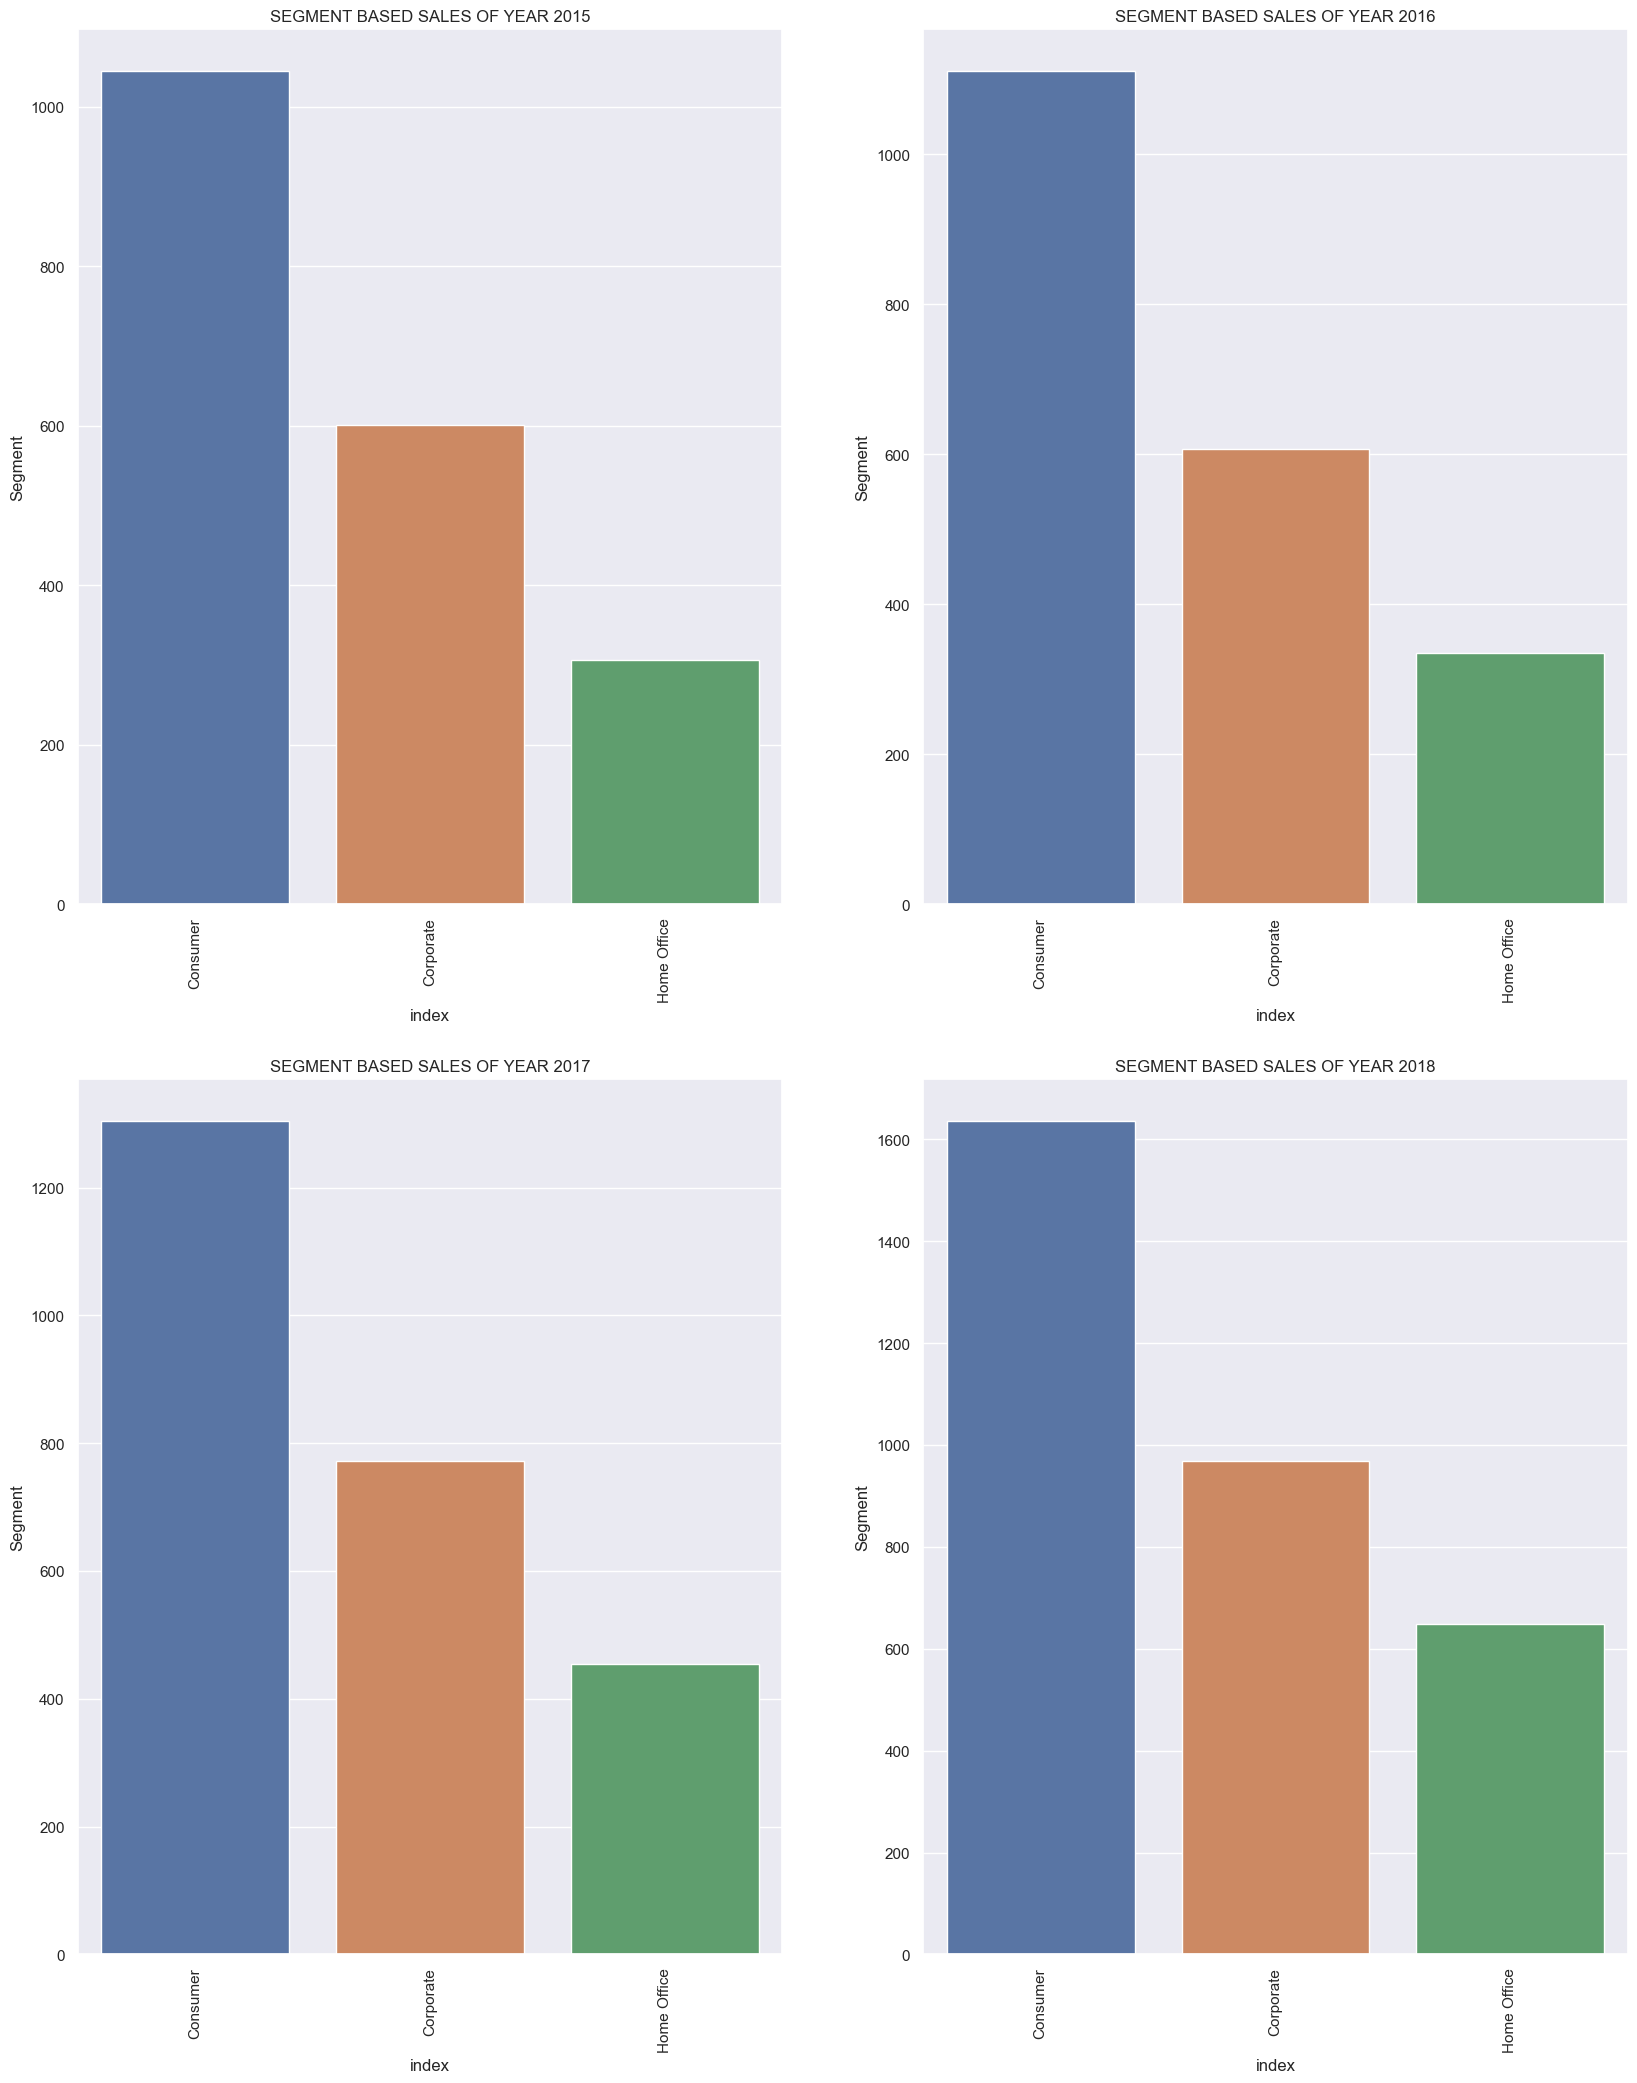

In [63]:
plt.figure(figsize=(20,25))
plt.subplot(2,2,1)
plt.title('SEGMENT BASED SALES OF YEAR 2015')
sns.barplot('index','Segment',data=segament_2015)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('SEGMENT BASED SALES OF YEAR 2016')
sns.barplot('index','Segment',data=segament_2016)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('SEGMENT BASED SALES OF YEAR 2017')
sns.barplot('index','Segment',data=segament_2017)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title('SEGMENT BASED SALES OF YEAR 2018')
sns.barplot('index','Segment',data=segament_2018)
plt.xticks(rotation=90)

plt.show()

# REGIONAL BASED SALES 

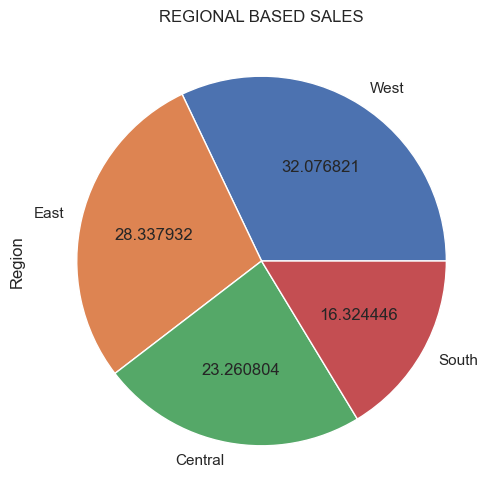

In [64]:
plt.figure(figsize=(10,6))
plt.title('REGIONAL BASED SALES')
regional_sales=df['Region'].value_counts().plot.pie(autopct='%2f')